# Lab: Trees

Lab associated with Module: Trees

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [4]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

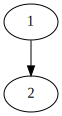

In [5]:
dot

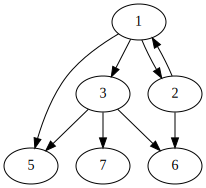

In [6]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [7]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.balance = None


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    root.balance = height(root.left) - height(root.right)
    
    return root

def height(rootNode):
    
    if rootNode is None:
        return 0
    return max(height(rootNode.left), height(rootNode.right)) + 1

def isBalanced(rootNode):
    
    if rootNode is None:
        return True
    
    lh = height(rootNode.left)
    rh = height(rootNode.right)
    
    if (abs(lh - rh) <= 1 and abs(lh - rh) >= -1) and isBalanced(rootNode.left) is True and isBalanced(rootNode.right) is True:
        return True
    
    return False

In [8]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [9]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [10]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [11]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [12]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

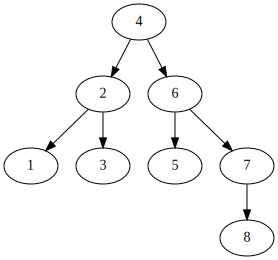

In [13]:
dot = visualize_tree(test1_tree)

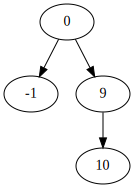

In [14]:
dot = visualize_tree(test2_tree)

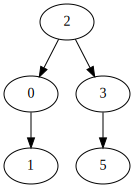

In [15]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [16]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [17]:
search(test3_tree, 3)

True

In [18]:
search(test1_tree, 18)

False

Let us write insert function now:

In [19]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            nodes.left.balance = height(nodes.left.left) - height(nodes.left.right)
            return
        else:
            insert(nodes.left, val)
            nodes.left.balance = height(nodes.left.left) - height(nodes.left.right)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            nodes.right.balance = height(nodes.right.left) - height(nodes.right.right)
            return
        else:
            insert(nodes.right, val)
            nodes.right.balance = height(nodes.right.left) - height(nodes.right.right)
            return

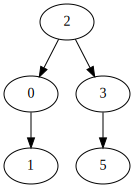

In [20]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

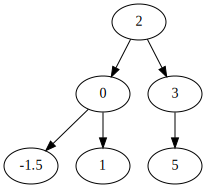

In [21]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [22]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

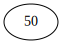

In [23]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

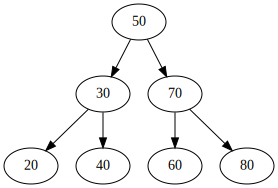

In [24]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

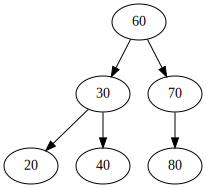

In [25]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write down code for activities in the onTrack Task sheet, in the following section </font>

In [26]:
class Node(object):
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.height = 1
        
class avl(object):
    
    def buildBinaryTree(self, nodes):

        if len(nodes) == 0:
            raise ValueError('list is empty')

        return self.binaryTree(nodes, 0, len(nodes) - 1)

    def binaryTree(self, nodes, start, end):

        if start > end:
            return

        middle = (start + end) // 2
        root = Node(nodes[middle])
        root.left = self.binaryTree(nodes, start, middle - 1)
        root.right = self.binaryTree(nodes, middle + 1, end)

        return root
    
    def getHeight(self, root):
    
        if root is None:
            return 0
        return max(self.getHeight(root.left), self.getHeight(root.right)) + 1
    
    def getBalance(self, root):
        
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)
    
    def getMinValue(self, root):
        #if tree is empty or left child of node is None, return root node
        if root is None or root.left is None:
            return root
        #else, recursively go to left child
        return self.getMinValue(root.left)
        
    def leftRotation(self, node):
        
        #store nodes right child in y
        y = node.right
        #store y's left child in T2
        T2 = y.left
        
        #perform rotation
        y.left = node
        node.right = T2
        
        #update heights
        node.height = height(node.left) - height(node.right)
        y.height = height(y.left) - height(y.right)

        return y

    def rightRotation(self, node):
        
        #store nodes left child in y
        y = node.left
        #store y's right child in T3
        T3 = y.right
        
        #perform rotation
        y.right = node
        node.left = T3
        
        #update heights
        node.height = height(node.left) - height(node.right)
        y.height = height(y.left) - height(y.right)

        return y
    
    def insert(self, root, val):
        
        #if tree is empty, return new node
        if not root:
            return Node(val)
        #if val is less than root value, go to left subtree
        elif val < root.val:
            root.left = self.insert(root.left, val)
        #if val is greater than or equal to root value, go to right subtree
        else:
            root.right = self.insert(root.right, val)
        
        #update height of ancestor node
        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))
        
        #get balance to check whether this node became unbalanced
        balance = self.getBalance(root)
        
        #if node is unbalanced
        #Left Left
        if balance > 1 and val < root.left.val:
            return self.rightRotation(root)
        #Right Right
        if balance < -1 and val > root.right.val:
            return self.leftRotation(root)
        #Left Right
        if balance > 1 and val > root.left.val:
            root.left = self.leftRotation(root.left)
            return self.rightRotation(root)
        #Right Left
        if balance < -1 and val < root.right.val:
            root.right = self.rightRotation(root.right)
            return self.leftRotation(root)

        return root
    
    def delete(self, root, key):

        # Perform standard BST delete
        if not root:
            return root

        elif key < root.val:
            root.left = self.delete(root.left, key)

        elif key > root.val:
            root.right = self.delete(root.right, key)

        else:
            # node with only one child or no child
            if root.left is None:
                temp = root.right
                root = None
                return temp

            elif root.right is None:
                temp = root.left
                root = None
                return temp

            #node with two children: get the inorder successor (smallest in the right subtree)
            temp = self.getMinValue(root.right)

            #copy the inorder successor's data to this node
            root.val = temp.val

            #delete the inorder successor
            root.right = self.delete(root.right, temp.val)

        #if the tree had only one node then return
        if root is None:
            return root

        #update the height of the ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))

        #get the balance factor
        balance = self.getBalance(root)

        #if the node is unbalanced, then try out the 4 cases
        #Left Left
        if balance > 1 and self.getBalance(root.left) >= 0:
            return self.rightRotation(root)

        #Right Right
        if balance < -1 and self.getBalance(root.right) <= 0:
            return self.leftRotation(root)

        #Left Right
        if balance > 1 and self.getBalance(root.left) < 0:
            root.left = self.leftRotation(root.left)
            return self.rightRotation(root)

        #Right Left
        if balance < -1 and self.getBalance(root.right) > 0:
            root.right = self.rightRotation(root.right)
            return self.leftRotation(root)

        return root

            
    def isBalanced(self, root):

        if root is None:
            return True
        
        #get height of left and right subtrees
        lh = self.getHeight(root.left)
        rh = self.getHeight(root.right)
        
        #recursively check if each node is balanced
        if (abs(lh - rh) <= 1 and abs(lh - rh) >= -1) and self.isBalanced(root.left) is True and self.isBalanced(root.right) is True:
            return True

        return False
    
    #finds path from root to node k, stores path in path[], return true if path exists, else return false
    def findPath(self, root, path, dest):

        if root is None:
            return False

        #store this node in path, removed if not in path from root to k
        path.append(root)

        #check if this node is same as destination node
        if root.val == dest.val:
            return True, path

        #check if destination node is in left or right sub-tree
        if ((root.left != None and self.findPath(root.left, path, dest)) or
            (root.right != None and self.findPath(root.right, path, dest))):
            return True, path

        #remove if this node is not in path to destination node
        path.pop()
        return False

    #return common ancestor of node1 and node2, return -1 if node1 and node2 not in tree
    def findCA(self, root, node1, node2):

        #store paths from root node to node1 and node2
        path1 = []
        path2 = []

        #check if node1 and node2 are in tree
        if (not self.findPath(root, path1, node1) or not self.findPath(root, path2, node2)):
            return -1

        #compare paths to node1 and node2 until finding where paths differ
        i = 0
        while(i < len(path1) and i < len(path2)):
            if path1[i] != path2[i]:
                break
            i += 1
        #return node before paths differ, this is the common ancestor
        return path1[i-1]

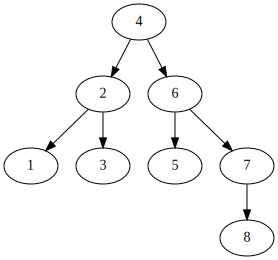

In [27]:
tree = avl()
test1 = [1, 2, 3, 4, 5, 6, 7, 8]

test1_tree = tree.buildBinaryTree(test1)

dot = visualize_tree(test1_tree)

In [32]:
print("the tree is balanced: {}".format(tree.isBalanced(test1_tree)))

the tree is balanced: True


In [29]:
node = tree.findCA(test1_tree, test1_tree.right.left, test1_tree.right.right.right)
print("common ancestor of {} and {} is {}".format(test1_tree.right.left.val, test1_tree.right.right.right.val, node.val))

common ancestor of 5 and 8 is 6


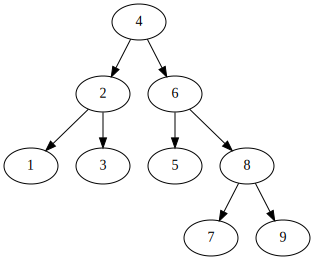

In [30]:
tree.insert(test1_tree, 9)
dot = visualize_tree(test1_tree)

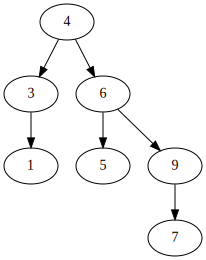

In [31]:
tree.delete(test1_tree, 2)
tree.delete(test1_tree, 8)
dot = visualize_tree(test1_tree)

***